# Neural Network for generating italian Names



In [3]:
import random
import matplotlib.pyplot as plt
import re
import torch
import torch.nn.functional as F
%matplotlib inline

In [4]:
#Importing the data
row_names = open("nomi_italiani.txt","r").read().splitlines()
for _ in range(random.randint(1,10)):
    random.shuffle(row_names)



In [5]:
#Cleaning the data
def remove_special_characters(name):
    return re.sub(r'[^a-zA-Z0-9]', '', name)

names = [remove_special_characters(name) for name in row_names]


In [6]:
#Building the dictionary
characters = sorted(list(set(''.join(names))))

stoi = {ch : index+1 for index, ch in enumerate (characters)}
stoi['.'] = 0
itos = {index : ch for ch, index in stoi.items()}

In [7]:
# Creating the training set(80%), dev set(10%) and test set(10%)

chunk_size = 3

def create_dataset(names):
    X, Y = [], []

    for name in names : 
        context = [0] * chunk_size

        for ch in name + "." : 
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix]
            

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y            

#Splitting the list in training set, dev set, test set
index1 = int(0.8 * len(names))
index2 = int(0.9 * len(names))

Xtr,Ytr = create_dataset(names[:index1])
Xdev, Ydev = create_dataset(names[index1:index2])
Xtst, Ytst = create_dataset(names[index2:])
        

    


torch.Size([58871, 3]) torch.Size([58871])
torch.Size([7422, 3]) torch.Size([7422])
torch.Size([7315, 3]) torch.Size([7315])


In [9]:
#Hyperparameter of the net for fine-tuning
dimension_embedding = 10
input_fl = dimension_embedding * chunk_size
Nfl = 200
iteration = 20000

In [10]:
#Creatin the parameters of the Net

#Look up matrix(embedding matrix)
C = torch.randn(27,dimension_embedding)
#First Layer
W1 = torch.randn(input_fl,Nfl)
b1 = torch.randn(Nfl)
#Second Layer
W2 = torch.randn(Nfl,27)
b2 = torch.randn(27)

parameters = [C,W1,b1,W2,b2]

for par in parameters :
    par.requires_grad = True


total_params = sum(p.numel() for p in parameters)

print(f"Number of parameters: {total_params}")
lossi = []
stepi = []

Number of parameters: 11897


In [44]:
#Training the net one the training set using minibatch for better performance
for i in range(iteration):
    #Mini-batch
    ix = torch.randint(0, Xtr.shape[0], (32,))

    #Forward pass

    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,input_fl) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    #Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #Adjusting the values
    lr = 0.1
  
    for p in parameters : 
        p.data += - lr * p.grad
    
    
    lossi.append(loss.log10().item())
print(loss.item())
    
    

1.81325101852417


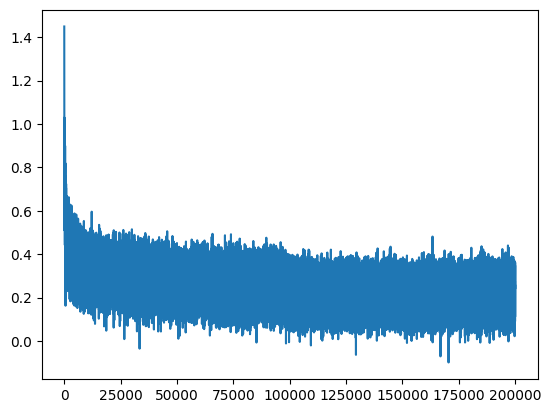

In [24]:
plt.plot(lossi)

In [25]:
#Evaluatin the loss on the dev set 
emb = C[Xdev]  # (32, 3, 2)
h = torch.tanh(emb.view(-1, input_fl) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

1.8365885019302368

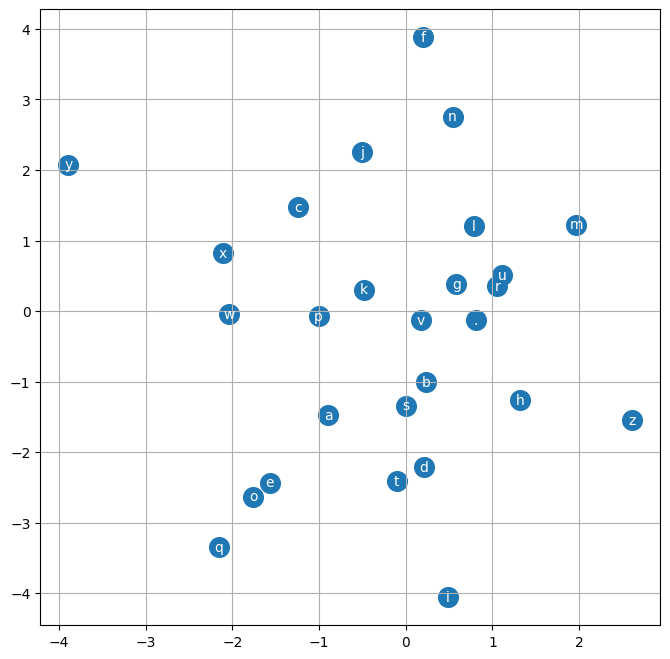

In [30]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [31]:

for _ in range(20):
    
    out = []
    context = [0] * chunk_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

rescando.
fedetto.
uberto.
romantenico.
ide.
divarrico.
battina.
basilde.
addi.
nolliadamina.
cusuzuetta.
romandro.
fanma.
celeuripio.
rauladila.
matta.
mitto.
retenocondo.
giulia.
clita.
